# 逻辑回归

这项作业将指导你建立一个逻辑回归分类器来识别猫。

**Instructions:**
- 尽可能不要在代码中使用循环，除非告诉你可以这么做~

**You will learn to:**
- 算法总体架构:
    - 初始化参数                            。
    - 计算损失函数及梯度
    - 使用梯度下降
- 按照正确顺序将上面的三个函数整合到一个主函数中

In [4]:
#可能你需要安装以下库
!pip install opencv-python

## 1 - 库文件##

运行以下代码来导入需要的包。
- [numpy](www.numpy.org) 是用来使用Python进行科学计算的。
- [h5py](http://www.h5py.org) 是用来与存储在H5文件中的数据集进行交互的。
- [matplotlib](http://matplotlib.org) 是一个用Python绘制图形的著名的库。
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) 是用来测试你所训练的模型的。


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
#from scipy import ndimage
import cv2
from lr_utils import load_dataset

%matplotlib inline

# 2 - 问题描述 ##

你的数据集 ("data.h5")包括:
    - 标记为cat（y=1）或non-cat（y=0）的训练集图片m_train
    - 标记为cat或non-cat的测试集图片m_test
    - 图片shape为(num_px, num_px, 3) ,3代表"RGB"3个通道.(可以发现，每张图片都是正方形)

你将构建一个简单的图像识别算法，将图片正确分类为cat或non-cat。              

运行以下代码来加载数据:

In [5]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
print(train_set_x_orig.shape)
print(train_set_y.shape)
print(test_set_x_orig.shape)
print(test_set_y.shape)
print(classes)

NameError: name 'load_dataset' is not defined

我们在数据集（训练和测试）的末尾添加了“_orig”，方便对它们进行预处理。

预处理后，将得到train_set_x和test_set_x。（标签train_set_y和test_set_y不需要预处理）          

train_set_x_orig和test_set_x_orig的每一行都是表示图像的数组。

可以通过运行以下代码来可视化(你也可以随意更改索引值`index` 重新运行来查看其他图像）。

y = [0], it's a 'non-cat' picture.


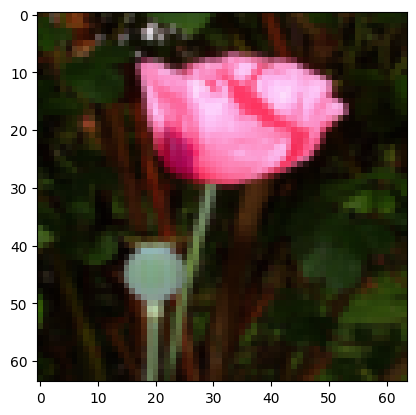

In [11]:
# Example of a picture
index = 30
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

**Exercise 定义以下变量：** 
    - m_train (训练样本数量)
    - m_test (测试样本数量)
    - num_px (训练集的图片像素宽度)

提示：`train_set_x_orig` 是一个 numpy数组，shape为(m_train, num_px, num_px, 3)，你可以通过`train_set_x_orig.shape[0]`来获取`m_train`  .

In [12]:
### START CODE HERE ### (≈ 3 lines of code)
m_train=train_set_x_orig.shape[0]
m_test=test_set_x_orig.shape[0]
num_px=train_set_x_orig.shape[1]

### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


**Expected Output：**
<table style="width:15%">
  <tr>
    <td>**m_train**</td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>**m_test**</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>**num_px**</td>
    <td> 64 </td> 
  </tr>
  
</table>


为了方便处理，我们需要把图像reshape到（num-px * num-px * 3，1）。

这样以后，我们的训练\测试数据集是一个numpy数组，其中每一列表示一个展平的图像，应有m_train\m_test列。



**Exercise:** 

Reshape训练集train_set_x_flatten和测试集test_set_x_flatten， 让(num_px, num_px, 3)展平到 (num\_px $*$ num\_px $*$ 3, 1).


提示：当你想把(a,b,c,d)形状的数组X展平到X_flatten(b$*$c$*$d, a)，也可以用: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [3]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)


train_set_x_flatten = train_set_x_orig.reshape(-1, train_set_x_orig.shape[0])
test_set_x_flatten=test_set_x_orig.reshape(-1,test_set_x_orig.shape[0])

### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

NameError: name 'train_set_x_orig' is not defined

**Expected Output**: 

<table style="width:35%">
  <tr>
    <td>**train_set_x_flatten shape**</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>**train_set_y shape**</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>**test_set_x_flatten shape**</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>**test_set_y shape**</td>
    <td>(1, 50)</td> 
  </tr>
  <tr>
  <td>**sanity check after reshaping**</td>
  <td>[17 31 56 22 33]</td> 
  </tr>
</table>

图片的RGB像素值是由三个0到255之间的数字组成的向量。   

机器学习中一个常见的预处理步骤是将数据集标准化，但对于图片数据集来说比较简单、方便，我们将数据集的每一行除以255（像素通道的最大值）就可以了。          



In [2]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

NameError: name 'train_set_x_flatten' is not defined

<font color='blue'>
**预处理数据集的常见步骤:**

- 找出数据的shape (m_train, m_test, num_px, ...)
- Reshape to (num_px \* num_px \* 3, 1)
- 标准化

## 3 - 算法结构 ##
            
你将建立一个逻辑回归来区分猫和非猫。

下图展示了为什么**逻辑回归实际上是一个非常简单的神经网络！**

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**逻辑回归算法的数学表达式**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

对所有的样本来计算损失函数
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**关键步骤**:

-初始化模型参数              
-最小化损失函数来训练、学习模型参数              
-使用学习到的参数进行预测（在测试集上）              
-分析结果并得出结论

## 4 - 构建算法 ## 

1. 定义模型结构 
2. 初始化参数
3. 循环:
    - 计算损失 (forward propagation)
    - 计算梯度 (backward propagation)
    - 更新参数 (gradient descent)

整合以上步骤，便可以搭建 `model()`.

### 4.1 - 函数帮助

**Exercise**: 

用python实现函数 `sigmoid()`. 

要用 $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ 来预测，可以使用np.exp().

In [16]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s=1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [17]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


**Expected Output**: 

<table>
  <tr>
    <td>**sigmoid([0, 2])**</td>
    <td> [ 0.5         0.88079708]</td> 
  </tr>
</table>

### 4.2 - 初始化参数

**Exercise:** 

实现w和b的参数初始化，你必须把w初始化为一个全0向量。

提示：可以使用numpy库中的函数np.zeros()。

In [21]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim, 1))
    b = 0.0

    ### END CODE HERE ###

    assert(w.shape == (dim, 1))     #条件为False时触发异常
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [22]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0.0


**Expected Output**: 


<table style="width:15%">
    <tr>
        <td>  ** w **  </td>
        <td> [[ 0.]
 [ 0.]] </td>
    </tr>
    <tr>
        <td>  ** b **  </td>
        <td> 0 </td>
    </tr>
</table>

对于本案例来说，w的shape应该为(num_px $\times$ num_px $\times$ 3, 1).

### 4.3 - 正向与反向传播

**Exercise:** 

完成函数 `propagate()` 来计算损失和梯度。

**Hints**:

前向:

- $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

这两个公式你可能会用到: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [28]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. 
    可能会使用到：np.dot()，np.log()，np.sum()
    
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST,define A and cost)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T, X) + b)
    cost  = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (define dw and db)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = 1 / m * np.dot(X, (A - Y).T)
    db = 1 / m * np.sum(A - Y)
    
    ### END CODE HERE ###
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [29]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


**Expected Output**:

<table style="width:50%">
    <tr>
        <td>  ** dw **  </td>
        <td> [[ 0.99993216]
 [ 1.99980262]]</td>
    </tr>
    <tr>
        <td>  ** db **  </td>
        <td> 0.499935230625 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 6.000064773192205</td>
    </tr>

</table>

### 4.4 - 优化
现在你需要用梯度下降更新参数

**Exercise:** 

完成优化函数`optimize()`,目标是通过最小化 $J$ 学习 $w$ 和 $b$ . 


In [30]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### (提取grads和cost)
        grads, cost = propagate(w, b, X, Y)

        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###（更新w和b）
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [31]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


**Expected Output**: 

<table style="width:40%">
    <tr>
       <td> **w** </td>
       <td>[[ 0.1124579 ]
 [ 0.23106775]] </td>
    </tr>
    <tr>
       <td> **b** </td>
       <td> 1.55930492484 </td>
    </tr>
    <tr>
       <td> **dw** </td>
       <td> [[ 0.90158428]
 [ 1.76250842]] </td>
    </tr>
    <tr>
       <td> **db** </td>
       <td> 0.430462071679 </td>
    </tr>

</table>

**Exercise:** 

上一个函数将输出学习到的w和b。我们利用它们实现`predict()` 函数，在测试集上测试。

计算步骤：

1. 计算 $ Y prediction = A = \sigma(w^T X + b)$

2. 将结果转换成 0 (if activation <= 0.5) 或 1 (if activation > 0.5), 并将结果存入 `Y_prediction`. 你可以使用 `if`/`else` 语句

In [33]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A=sigmoid(np.dot(w.T,X)+b)
    ### END CODE HERE ###

    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
        
        
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [34]:
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


**Expected Output**: 

<table style="width:30%">
    <tr>
         <td>
             **predictions**
         </td>
          <td>
            [[ 1.  1.]]
         </td>  
   </tr>

</table>


## 5 - 整合所有的函数到model中 ##

现在按照正确顺序，将所有前面部分中实现的函数组合在一起，构建整个模型。

**Exercise 实现模型：** :
    - Y_prediction 在测试集上的预测值
    - Y_prediction_train 在训练集上的预测
    - w, costs, grads 为 optimize() 的输出

In [46]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters（w and b） with zeros (≈ 1 line of code)
    dim=X_train.shape[0]
    w, b = initialize_with_zeros(dim)


    # Gradient descent(use optimize function) (≈ 1 line of code)
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)


    w  = params["w"]
    b = params["b"]
    # Retrieve parameters w and b from dictionary "params"

    
    Y_prediction_train= predict(w, b, X_train)
    Y_prediction_test=predict(w, b, X_test)
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Run the following cell to train your model.

In [47]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.709726
Cost after iteration 200: 0.657712
Cost after iteration 300: 0.614611
Cost after iteration 400: 0.578001
Cost after iteration 500: 0.546372
Cost after iteration 600: 0.518331
Cost after iteration 700: 0.492852
Cost after iteration 800: 0.469259
Cost after iteration 900: 0.447139
Cost after iteration 1000: 0.426262
Cost after iteration 1100: 0.406617
Cost after iteration 1200: 0.388723
Cost after iteration 1300: 0.374678
Cost after iteration 1400: 0.365826
Cost after iteration 1500: 0.358532
Cost after iteration 1600: 0.351612
Cost after iteration 1700: 0.345012
Cost after iteration 1800: 0.338704
Cost after iteration 1900: 0.332664
train accuracy: 91.38755980861244 %
test accuracy: 34.0 %


**Expected Output**: 

<table style="width:40%"> 
    
   <tr>
        <td> **Train Accuracy**  </td> 
        <td> 99.04306220095694 % </td>
    </tr>

   <tr>
        <td>**Test Accuracy** </td> 
        <td> 70.0 % </td>
    </tr>
</table> 




**Comment**: 

训练精度接近100%，说明模型被训练的不错。测试误差为68%，因为我们使用的数据集很小，而且逻辑回归是一个线性分类器，所以对于这个简单的模型来说，这个结果已经不算太差了。

如果想做的更好，下周你会学到一个更棒的分类器！              

ps：可以看到，模型显然过拟合了。后面我们可以学习使用正则化等方式来优化。

y = 1, you predicted that it is a "non-cat" picture.


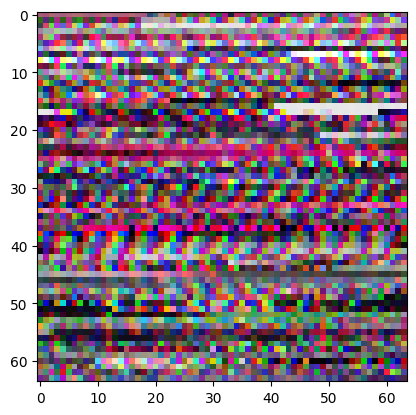

In [48]:
# Example of a picture that was wrongly classified.
index = 9
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")

我们也绘制一下损失函数和梯度。

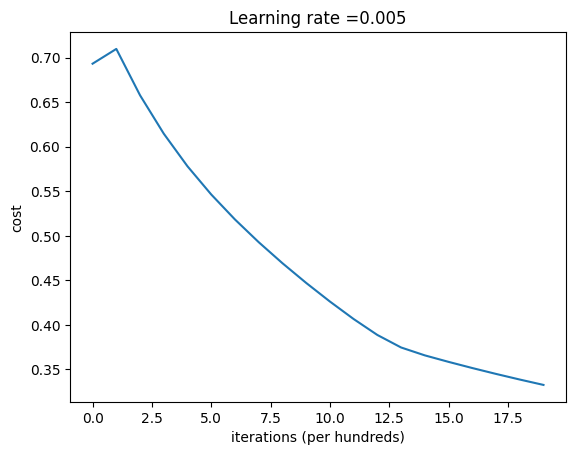

In [49]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

## 6 - 进一步分析 (选做) ##

我们来探索一下更多的学习率 $\alpha$ 的可能性


**Reminder**:
为了使梯度下降起作用，你必须明智地选择学习率$\alpha$。学习率决定了我们更新参数的速度。

如果学习率太大，我们可能会“超调”最佳值。如果太小，我们将需要太多的迭代来收敛。

下面，我们尝试使用不同的学习率，比较模型的学习曲线，你可以自己调整`learning_rates` 然后看看会发生什么。


learning rate is: 0.01
train accuracy: 71.29186602870814 %
test accuracy: 34.0 %

-------------------------------------------------------

learning rate is: 0.005
train accuracy: 87.08133971291866 %
test accuracy: 34.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 74.16267942583733 %
test accuracy: 34.0 %

-------------------------------------------------------

learning rate is: 0.0005
train accuracy: 72.72727272727273 %
test accuracy: 34.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 66.02870813397129 %
test accuracy: 34.0 %

-------------------------------------------------------



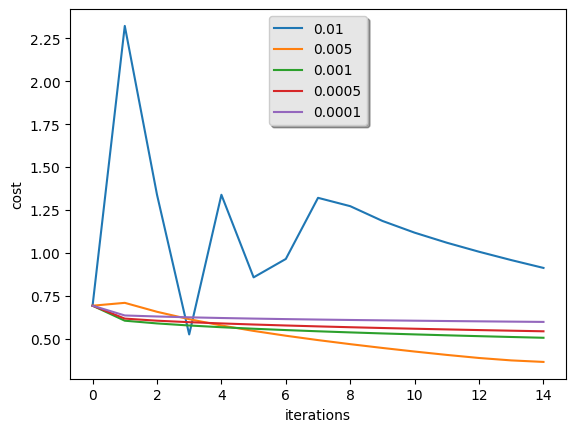

In [43]:
learning_rates = [0.01, 0.005, 0.001, 0.0005, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## 7 - 使用自己的图像来测试  ##


In [50]:
my_image = "cat_in_iran.jpg"
fname = "images/" + my_image
image = np.array(cv2.imread(fname))
print(image.shape)
my_image = cv2.resize(image, (num_px,num_px)) #变成64*64*3
my_image = my_image.reshape(my_image.shape[0]*my_image.shape[1]*my_image.shape[2],1)
my_image.shape

(1115, 1114, 3)


(12288, 1)

y = 0.0, your algorithm predicts a "non-cat" picture.


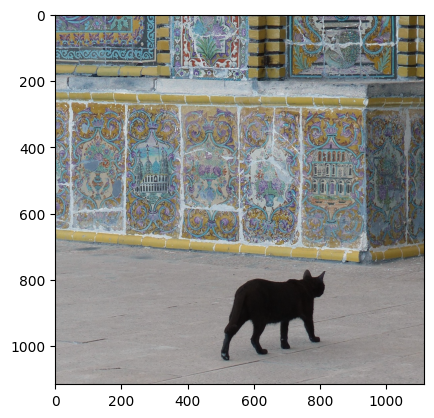

In [51]:

## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "cat_in_iran.jpg"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image

image = np.array(cv2.imread(fname))
my_image = cv2.resize(image, (num_px,num_px)) 
my_image = my_image.reshape(my_image.shape[0]*my_image.shape[1]*my_image.shape[2],1)

my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

Bibliography:
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c